In [6]:
%matplotlib inline

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Is it chaos?
There's a [famous theorem](https://en.wikipedia.org/wiki/Poincar%C3%A9%E2%80%93Bendixson_theorem) in dynamical systems which states that "chaotic" dynamics requires a system with at least three variables. But consider the following ordinary differential equations:
$$\frac{dx}{dt} = \frac{xy}{x^2 + y^2} - \alpha x$$
$$\frac{dy}{dt} = \frac{y^2}{x^2 + y^2} - \beta (y - 1) - 1$$
These are easily solved numerically with the SciPy `odeint` function.

In [8]:
alpha = 0.3
beta = 0.7

In [9]:
def xdot(y):
    return y[0]*y[1]/(y[0]**2 + y[1]**2) - alpha*y[0]
def zdot(y):
    return y[1]**2/(y[0]**2 +y[1]**2) - beta*(y[1] - 1) -1
def deriv(y, t):
    return (xdot(y), zdot(y))

In [10]:
t = np.linspace(0, 300, 10000)

In [11]:
y = odeint(deriv, y0=(1,0), t=t)

Below are the results plotted against time, and as a phase-space plot.

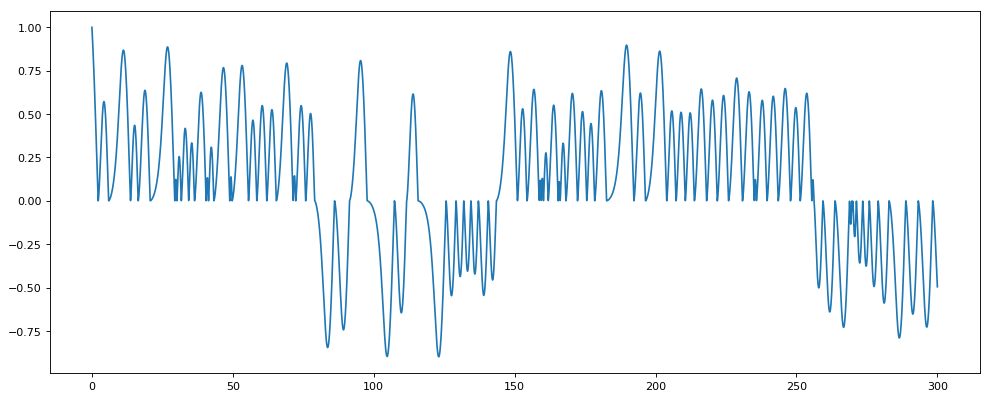

In [12]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t,y[:,0])

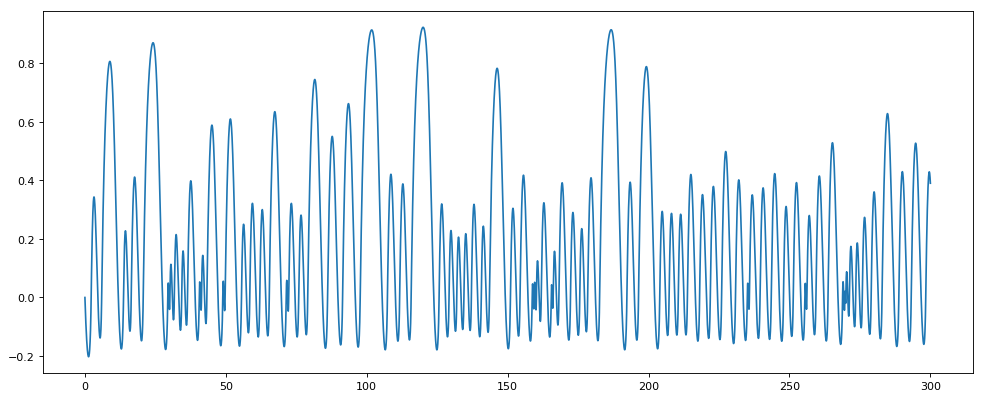

In [49]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t, y[:,1])

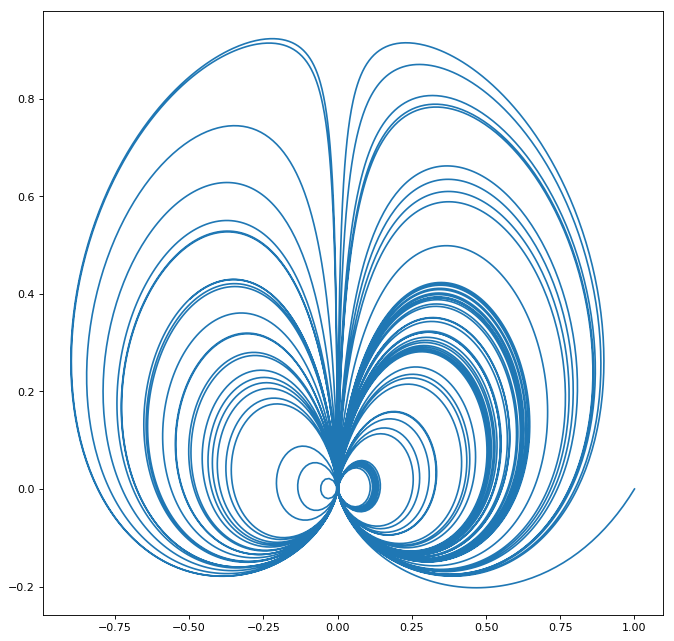

In [50]:
plt.figure(figsize=(10,10), dpi=80)
plt.plot(y[:,0], y[:,1])

Is this chaos? One way we might check would be to make a small change in initial conditions, and observe if the solution exhibits sensitive dependence, i.e. if it diverges rapidly from the solution seen with the original conditions.

In [64]:
y2 = odeint(deriv, y0=(1,0.000000000001), t=t)

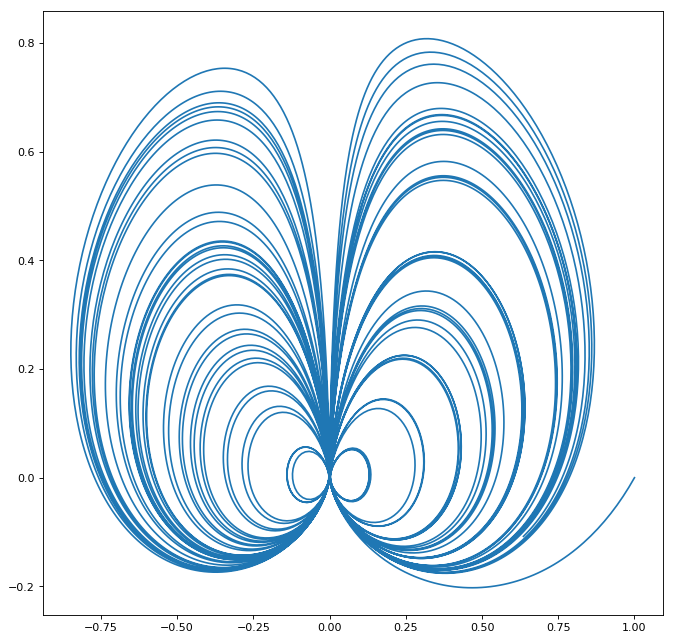

In [65]:
plt.figure(figsize=(10,10), dpi=80)
plt.plot(y2[:,0], y2[:,1])

That's pretty obviously different, even though we only changed the starting `y` value by $10^{-9}$, or 1 billionth. Let's overlay the time-series plots, and we'll only plot the first 50 seconds:

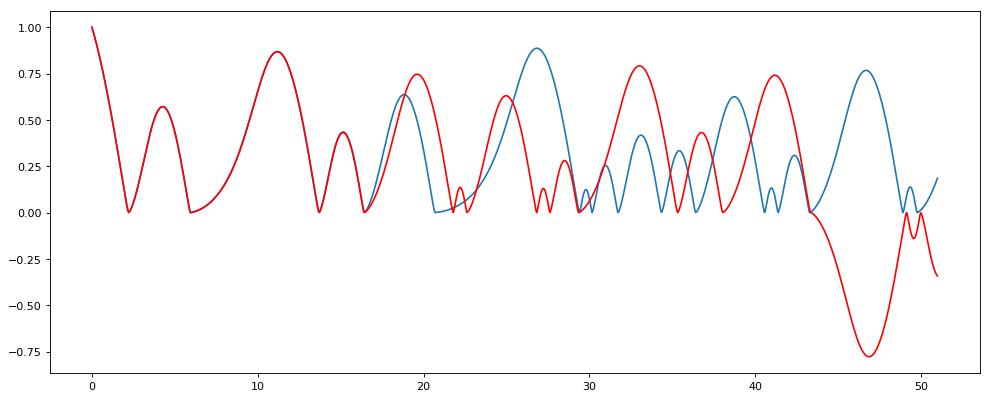

In [70]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t[0:1700],y[0:1700,0])
plt.plot(t[0:1700],y2[0:1700,0],color='red')

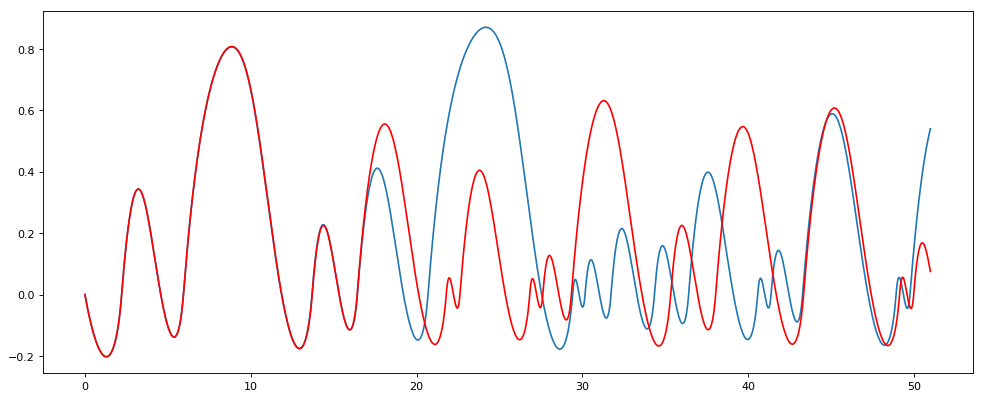

In [71]:
plt.figure(figsize=(15,6), dpi=80)
plt.plot(t[0:1700],y[0:1700,1])
plt.plot(t[0:1700],y2[0:1700,1],color='red')

Sure looks like chaos doesn't it. Have we discovered a true mathematical paradox?